# Demo notebook of the PulseBuilder_v3

In [11]:
from pyHegel import *
from pyHegel.commands import *
from pyHegel.instruments import *

awg = instruments.tektronix.tektronix_AWG('TCPIP0::AWG5200-XXXX.mshome.net::inst0::INSTR')
rto = instruments.rohdeschwarz.rs_rto_scope('USB0::0x0AAD::0x0197::1329.7002k14-300206::INSTR')

Destroying name_not_found = <"tektronix_AWG(TCPIP0::AWG5200-XXXX.mshome.net::inst0::INSTR)" instrument at 0x055c34e0>
Destroying name_not_found = <"rs_rto_scope(USB0::0x0AAD::0x0197::1329.7002k14-300206::INSTR)" instrument at 0x055c3518>


c:\Users\dphy-dupontferrielab\Documents\Alexis_Test
Waveform single_shot_sweep was deleted
Waveform single_shot_sweep was created
acq_time: 0.027204
acq_nb: 10


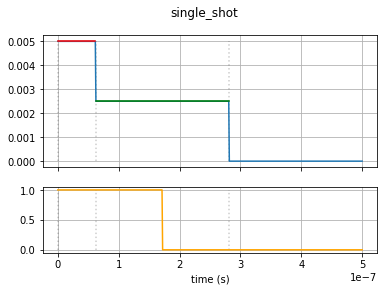

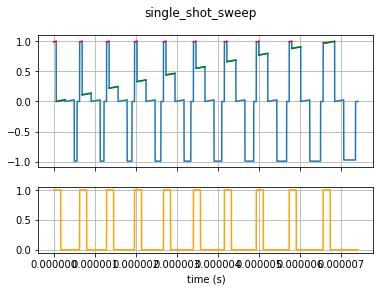

In [13]:
%cd C:\Users\dphy-dupontferrielab\Documents\Alexis_Test
%run -i PulseBuilder/pulse_v3.py

sample_rate = 32e3

# A Segment is a combination of AtomSegment
# We insert AtomSegment in a Segment with:
# segment.insert(Atom) or,
# segment.insertNew(AtomType, (args), duration, name) or,
# segment.insertStep([values], [durations], [names]:optional)

#TODO: testcase for adding the same atom several time
single_shot = Segment('single_shot')
single_shot.insertStep([0.005, 0.0025, 0], 
                       [2e-3, 7e-3, 7e-3], 
                       ['inject_wait', 'readout', 'empty'])
single_shot.mark('inject_wait')
single_shot.mark('readout', (0, 0.5))

pulseDraw(single_shot, sample_rate,
          highlight_atoms=[('inject_wait','red'), ('readout','green')],
          vert_lines=True)

multiple_shot = single_shot.makeVaryingSequence(10,
    ['readout'], ['value'], [(0.,0.005)],
    wait_time=0.002, constant_slope=0.02, compensate=-0.005,
    name='single_shot_sweep')
pulseDraw(multiple_shot, sample_rate, normalize=True,
          highlight_atoms=[('inject_wait','red'), ('readout','green')])

sendSequence(awg, multiple_shot, sample_rate, force=True)
awg.output_en.set(True)
awg.run()

print 'acq_time: ' +str(multiple_shot.getMaxSegmentDuration())
print 'acq_nb: ' +str(multiple_shot.getNbSegment())